Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.
Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report
Url=

https://raw.githubusercontent.com/BigDataGal/Python-for-Data-
Science/master/titanic-train.csv

titanic = pd.read_csv(url)
titanic.columns =
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti
cket','Fare','Cabin','E mbarked']


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [96]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

In [2]:
Url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
titanic = pd.read_csv(Url)

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Colums:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Shape:  (891, 12)


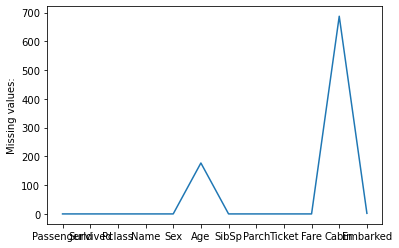

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


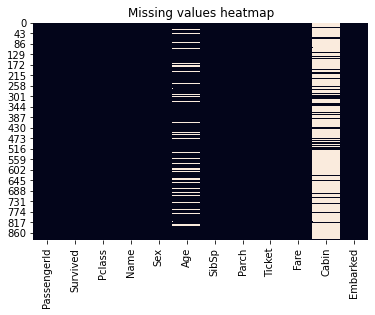

In [6]:
print("Colums: ", titanic.columns.values)
print("Shape: ", titanic.shape)

# Missing values
plt.ylabel("Missing values:")
plt.plot(pd.DataFrame(titanic.isnull().sum()))
plt.show()
print(titanic.isnull().sum())

sns.heatmap(titanic.isnull(), cbar=False).set_title("Missing values heatmap")
plt.show()

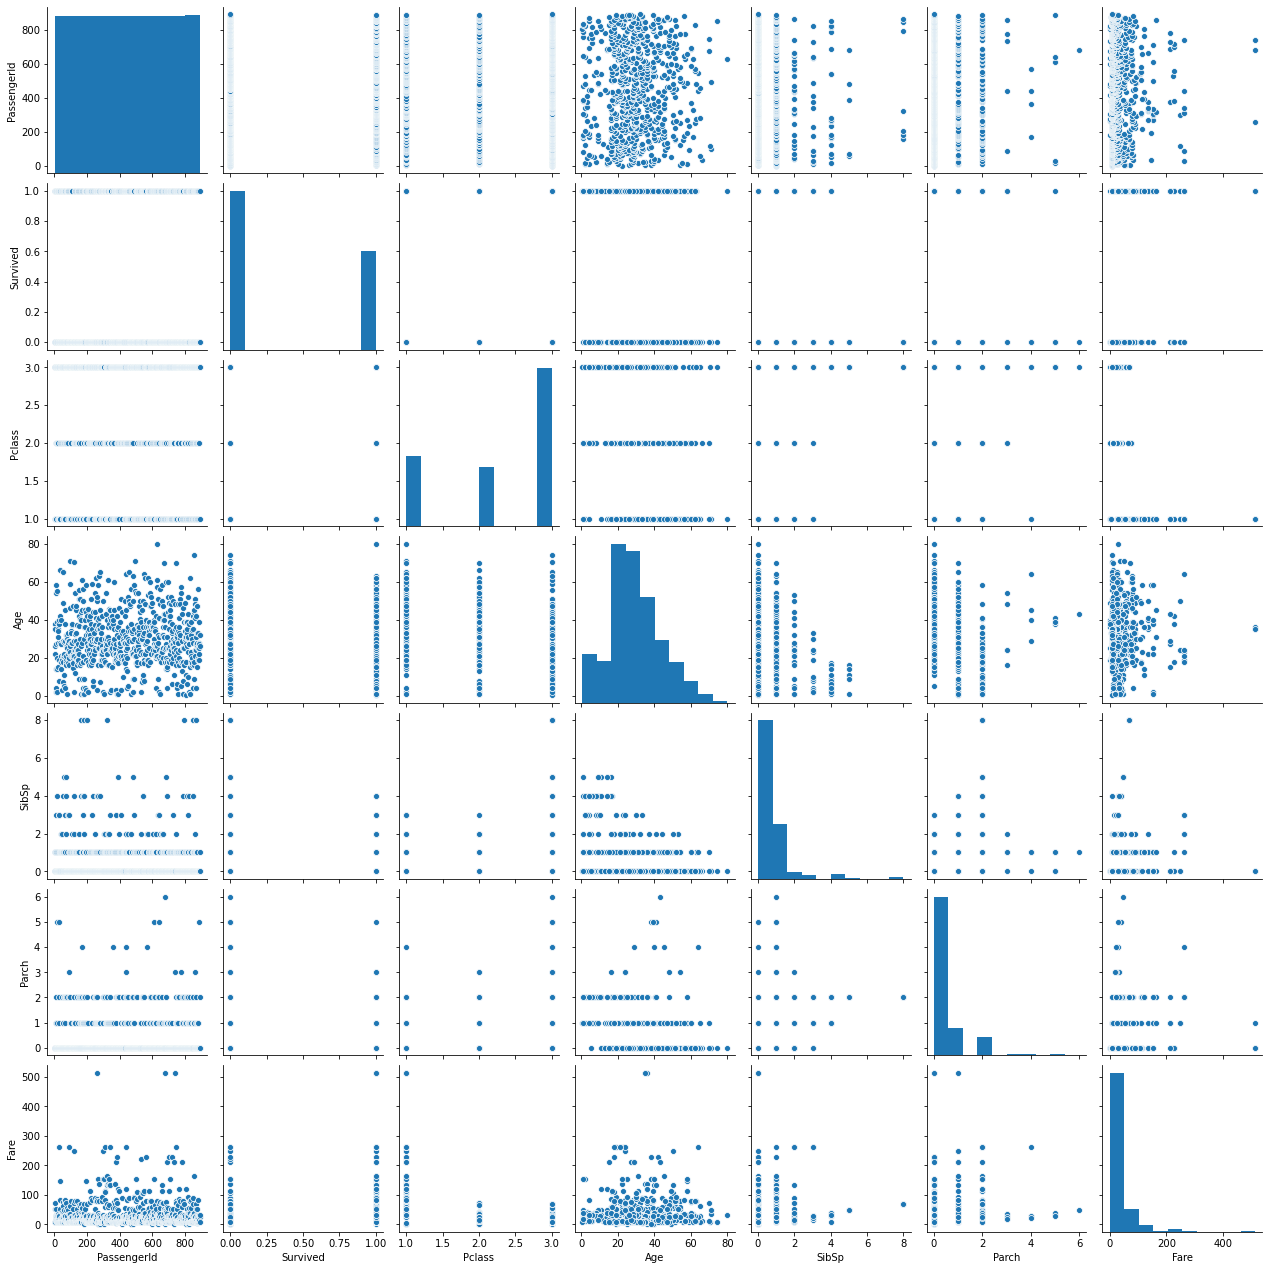

In [7]:
sns.pairplot(titanic)

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
corrmat = titanic.corr()
corrmat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

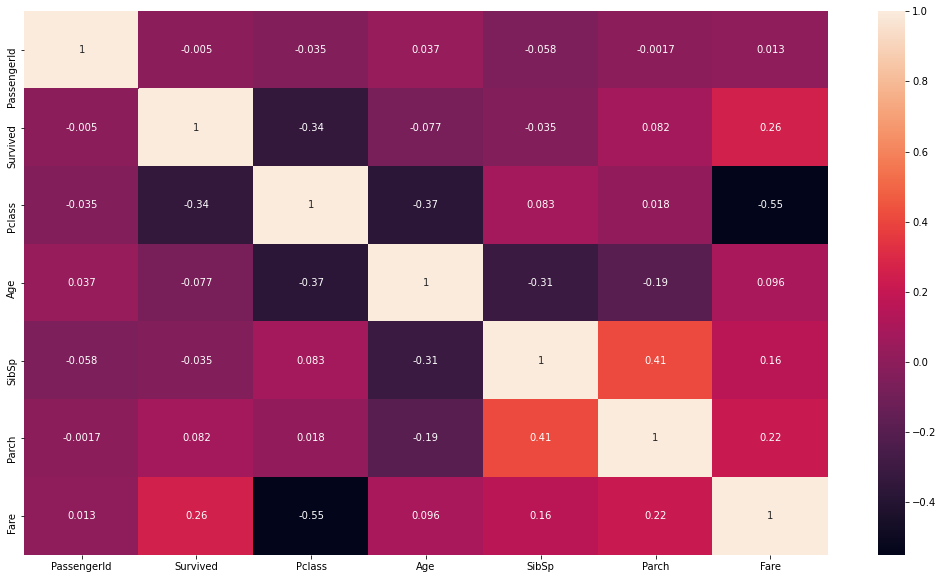

In [10]:
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrmat, annot=True, annot_kws={"size":10})

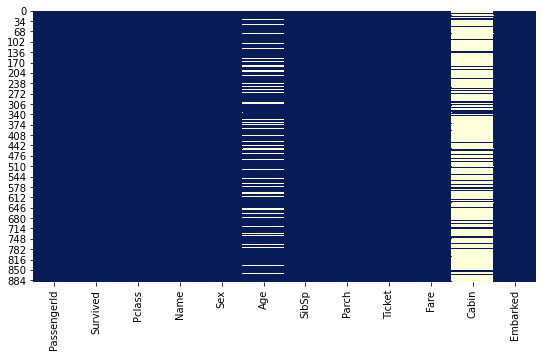

In [11]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(titanic.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [12]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

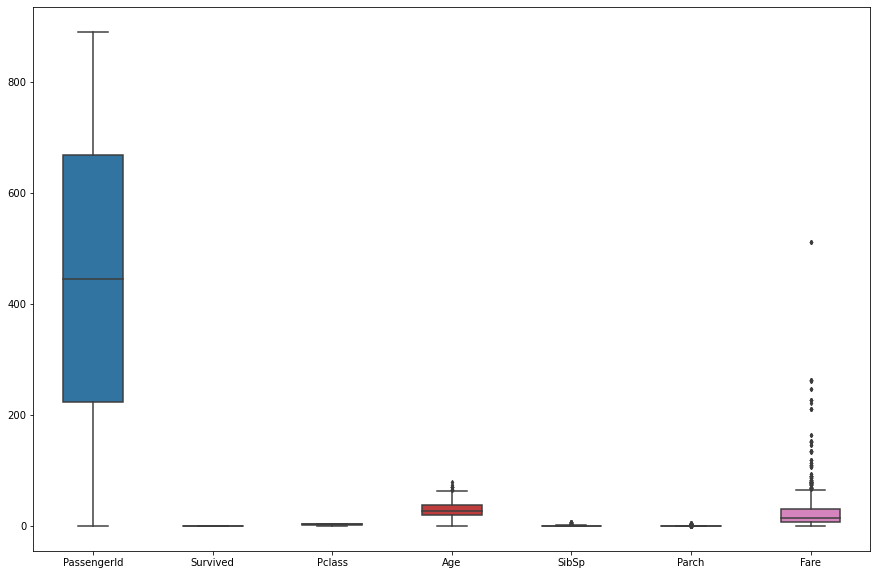

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=titanic, width= 0.5,ax=ax,  fliersize=3)

Text(0, 0.5, 'Survived')

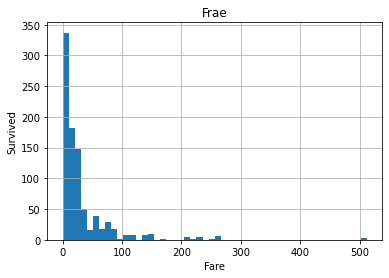

In [14]:
figure= titanic.Fare.hist(bins=50)
figure.set_title("Frae")
figure.set_xlabel("Fare")
figure.set_ylabel("Survived")

In [15]:
titanic['cabin_null']=np.where(titanic['Cabin'].isnull(),1,0)
titanic['cabin_null'].mean()

0.7710437710437711

In [16]:
titanic.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Copy the dataset for further analysis

In [17]:
df= titanic.copy()

In [18]:
#I drop those columns
df = df.drop(columns = ['Cabin','Name','Ticket','PassengerId','cabin_null'])

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## Exploratory Data Analysis

### Embarked

Missing values

In [21]:
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace = True)

### Age

Missing values

In [22]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [23]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [24]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [25]:
median=df.Age.median()
median

28.0

In [26]:
impute_nan(df,"Age",median)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_median,Age_random
0,0,3,male,22.0,1,0,7.2500,S,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,35.0,35.0


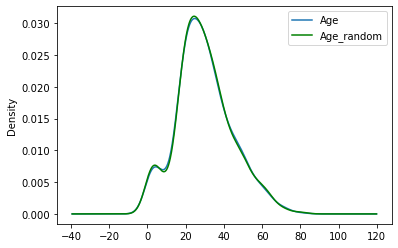

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
#df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [29]:
'''df['Age_random'] = pd.cut(titanic.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])
sns.countplot(x="Age_random", hue="Survived", data=df, palette=["C1", "C0"]).legend(labels=["Not survived", "Survived"])
plt.show()'''

'df[\'Age_random\'] = pd.cut(titanic.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])\nsns.countplot(x="Age_random", hue="Survived", data=df, palette=["C1", "C0"]).legend(labels=["Not survived", "Survived"])\nplt.show()'

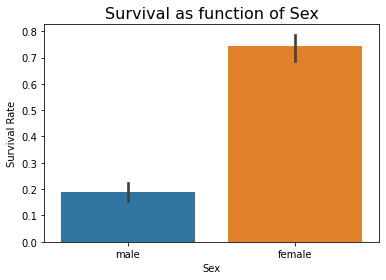

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [30]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Sex", fontsize=16)

plt.show()
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

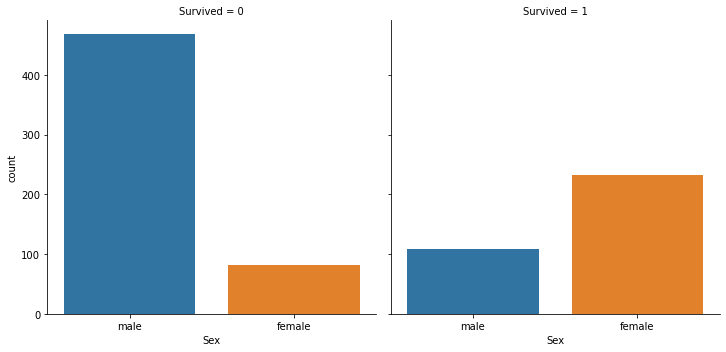

In [31]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df);

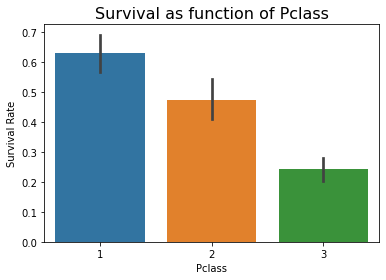

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [32]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass", fontsize=16)

plt.show()
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

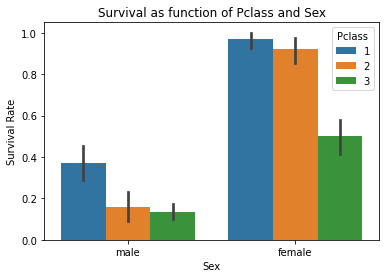

In [33]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

In [34]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [35]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


C:\Users\Ashit Debdas\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


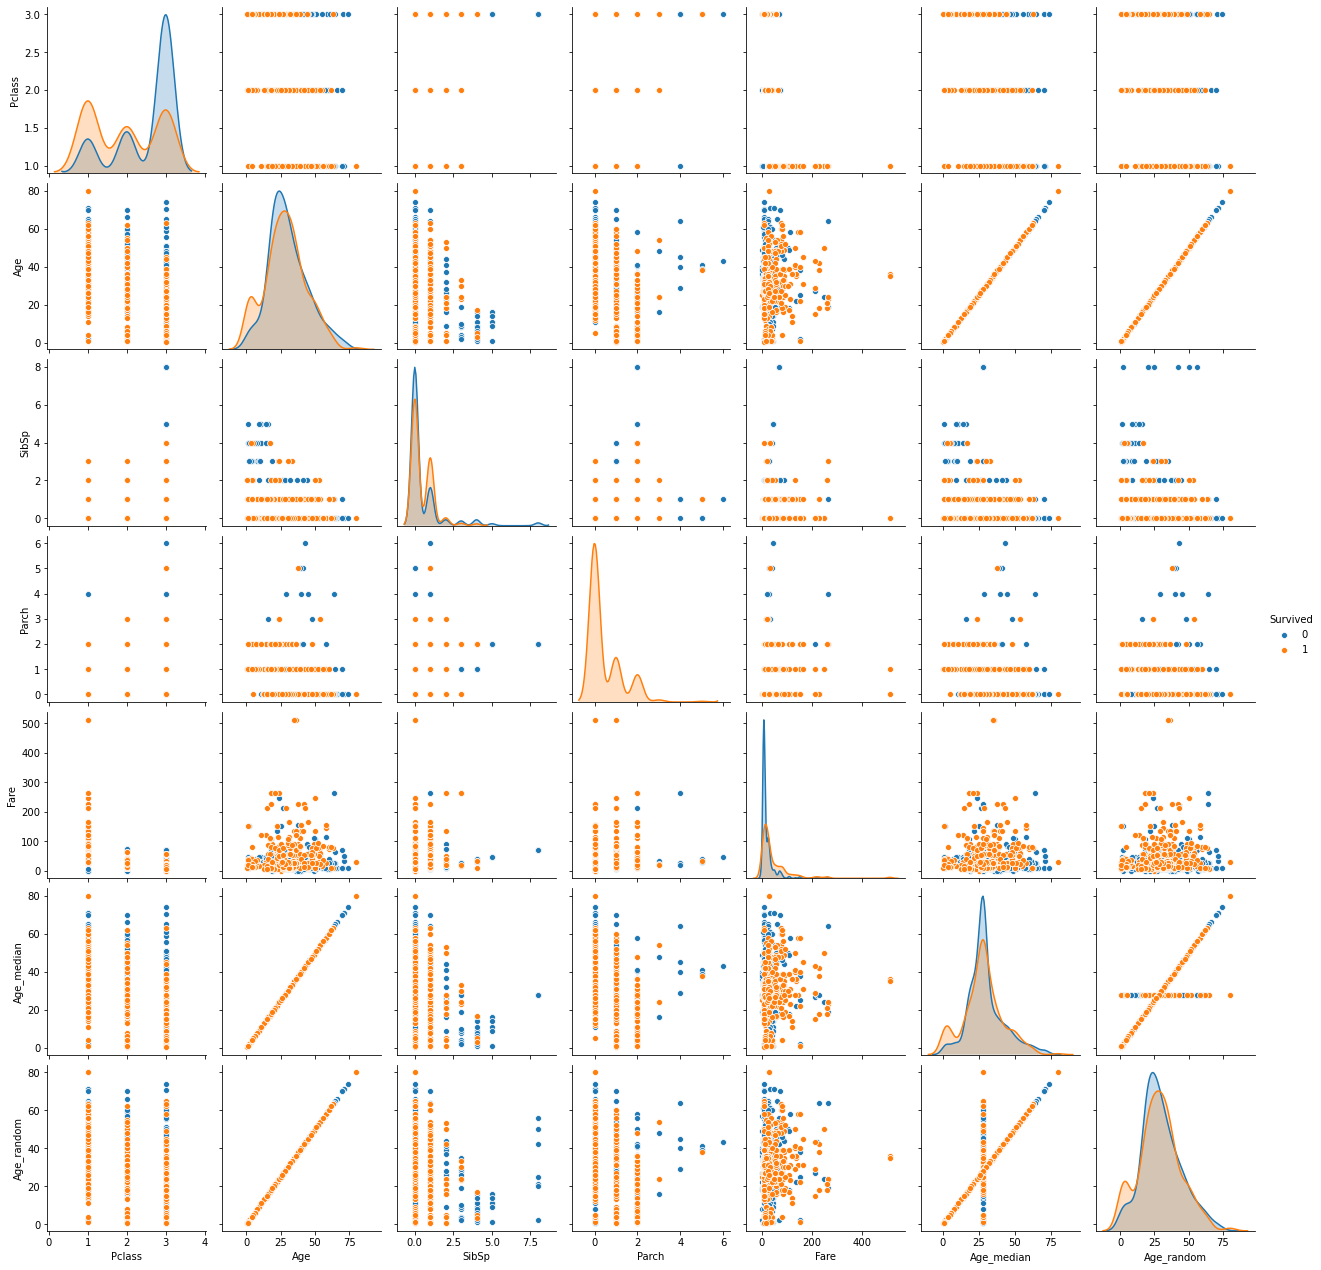

In [36]:
sns.pairplot(data=df, hue="Survived")

In [37]:
label = df['Survived']

<AxesSubplot:ylabel='Survived'>

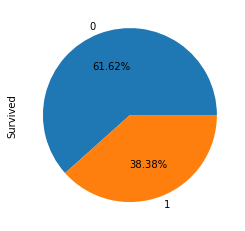

In [38]:
label.value_counts().plot.pie(autopct='%1.2f%%')

In [39]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
Age_median      0
Age_random      0
dtype: int64

In [40]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_median,Age_random
0,0,3,male,22.0,1,0,7.2500,S,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,27.0,27.0
887,1,1,female,19.0,0,0,30.0000,S,19.0,19.0
888,0,3,female,NaN,1,2,23.4500,S,28.0,15.0
889,1,1,male,26.0,0,0,30.0000,C,26.0,26.0


In [41]:
df1= df.drop(columns = ['Age','Age_median'])

In [83]:
df1 = pd.get_dummies(df1,drop_first=True)

In [84]:
df1.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_random,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.0,1,0,1
1,1,1,1,0,71.2833,38.0,0,0,0
2,1,3,0,0,7.9250,26.0,0,0,1
3,1,1,1,0,53.1000,35.0,0,0,1
4,0,3,0,0,8.0500,35.0,1,0,1


In [85]:
X = df1.drop(columns = 'Survived')
y = df1['Survived']

In [88]:
#X

In [86]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state= 355)

In [112]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'Age_random',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

In [114]:
tree.score(x_train,y_train)

0.9887640449438202

In [115]:
predicted = tree.predict(x_test)
predicted

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [116]:
accuracy = accuracy_score(y_test,predicted)
accuracy

0.75

In [117]:
print(confusion_matrix(y_test,predicted))
print(accuracy_score(y_test,predicted))
print(classification_report(y_test,predicted))

[[135  36]
 [ 31  66]]
0.75
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       171
           1       0.65      0.68      0.66        97

    accuracy                           0.75       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.75      0.75      0.75       268



#### GridSearch CV

In [241]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [1,2,3,4, 5,8,9,10,14]
min_samples_leaf = [1, 2,3, 4,5,6,8,10]
grid_cv = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini'],
               'splitter' : ['best', 'random']}
print(grid_cv)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 8, 9, 10, 14], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 8, 10], 'criterion': ['entropy', 'gini'], 'splitter': ['best', 'random']}


In [242]:
grid_cv = GridSearchCV(estimator=tree,
                     param_grid=grid_param,
                     cv=6,
                       verbose=2,
                       n_jobs =-1)

In [243]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [244]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 6, 'splitter': 'random'}


In [250]:
grid_search.best_score_

0.8217161290322581

In [251]:
t_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth =11, min_samples_leaf= 4, min_samples_split= 6, splitter ='random')
t_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [252]:
t_tree.score(x_test,y_test)

0.8171641791044776

In [254]:
y_pred=t_tree.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[152  19]
 [ 30  67]]
Accuracy Score 0.8171641791044776
Classification report:               precision    recall  f1-score   support

           0       0.84      0.89      0.86       171
           1       0.78      0.69      0.73        97

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.82      0.81       268

